# Student Performance Indicator

Life cycle of Machine Learning Project

- Understand the problem statement
- Data Collection
- Data checks to perform
- Exploratory Data Analysis
- Data Preprocessing
- Model Building
- Choosing the best model

## 1) Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course.

## 2) Data Collection

- Data Source: [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- Data consists of 1000 records and 8 columns.

### 2.1) Import Data and Required Packages


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings("ignore")

%matplotlib inline

Import data from csv file.


In [8]:
df = pd.read_csv("../data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

### 2.2) Dataset information

- gender : sex of students -> (Male/Female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3) Data checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1) Check Missing Values


In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2) Check Duplicates


In [12]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values in the dataset.


### 3.3) Check Data Types


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Check Unique Values


In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Check Statistics of Dataset


In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


### 3.7) Exploring Data


In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
for column in df.columns:
    if not df[column].dtype == "O":
        continue
    print(f"{column}: ")
    print(df[column].unique())

gender: 
['female' 'male']
race_ethnicity: 
['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: 
['standard' 'free/reduced']
test_preparation_course: 
['none' 'completed']


In [24]:
numeric_features = [
    feature for feature in df.columns if df[feature].dtype != "O"
]
categorical_features = [
    feature for feature in df.columns if df[feature].dtype == "O"
]
print("Numeric Features: ")
print(numeric_features)
print("Categorical Features: ")
print(categorical_features)

Numeric Features: 
['math_score', 'reading_score', 'writing_score']
Categorical Features: 
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8) Adding columns for "Total Score" and "Average Score"


In [61]:
df["total_score"] = (
    df["math_score"] + df["reading_score"] + df["writing_score"]
)
df["average"] = df["total_score"] / len(numeric_features)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [48]:
score_fields = ["reading_score", "writing_score", "math_score"]

for score_field in score_fields:
    max_score = df[df[score_field] == 100]["average"].count()
    less_than_20_score = df[df[score_field] <= 20]["average"].count()

    score_subject = score_field.split("_")[0]
    print(
        f"Number of students with max score in {score_subject}: {max_score}\n"
        f"Number of students with less than 20 score in {score_subject}: "
        f"{less_than_20_score}\n"
        "---"
    )

Number of students with max score in reading: 17
Number of students with less than 20 score in reading: 1
---
Number of students with max score in writing: 14
Number of students with less than 20 score in writing: 3
---
Number of students with max score in math: 7
Number of students with less than 20 score in math: 4
---


Insights:

- From above values we get students have performed the worst in Maths
- Best performance is in reading section


## 4) Data Visualization

### 4.1) Visualizing average score distribution

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1) Histogram and KDE for Average Score


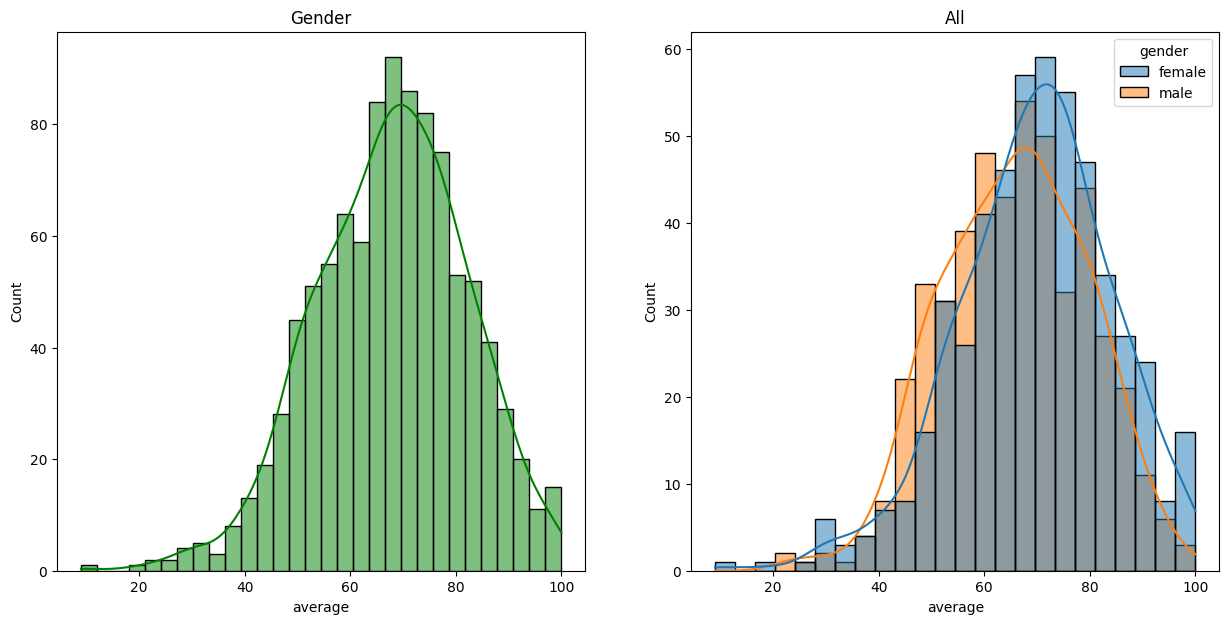

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

histograms = [
    ("All", 121, dict(data=df, x="average", bins=30, color="g")),
    ("Gender", 122, dict(data=df, x="average", hue="gender")),
]

for histogram in histograms:
    plt.title(histogram[0])
    plt.subplot(histogram[1])
    sns.histplot(**histogram[2], kde=True)
plt.show()

Insights

- Female students tend to perform well then Male students.


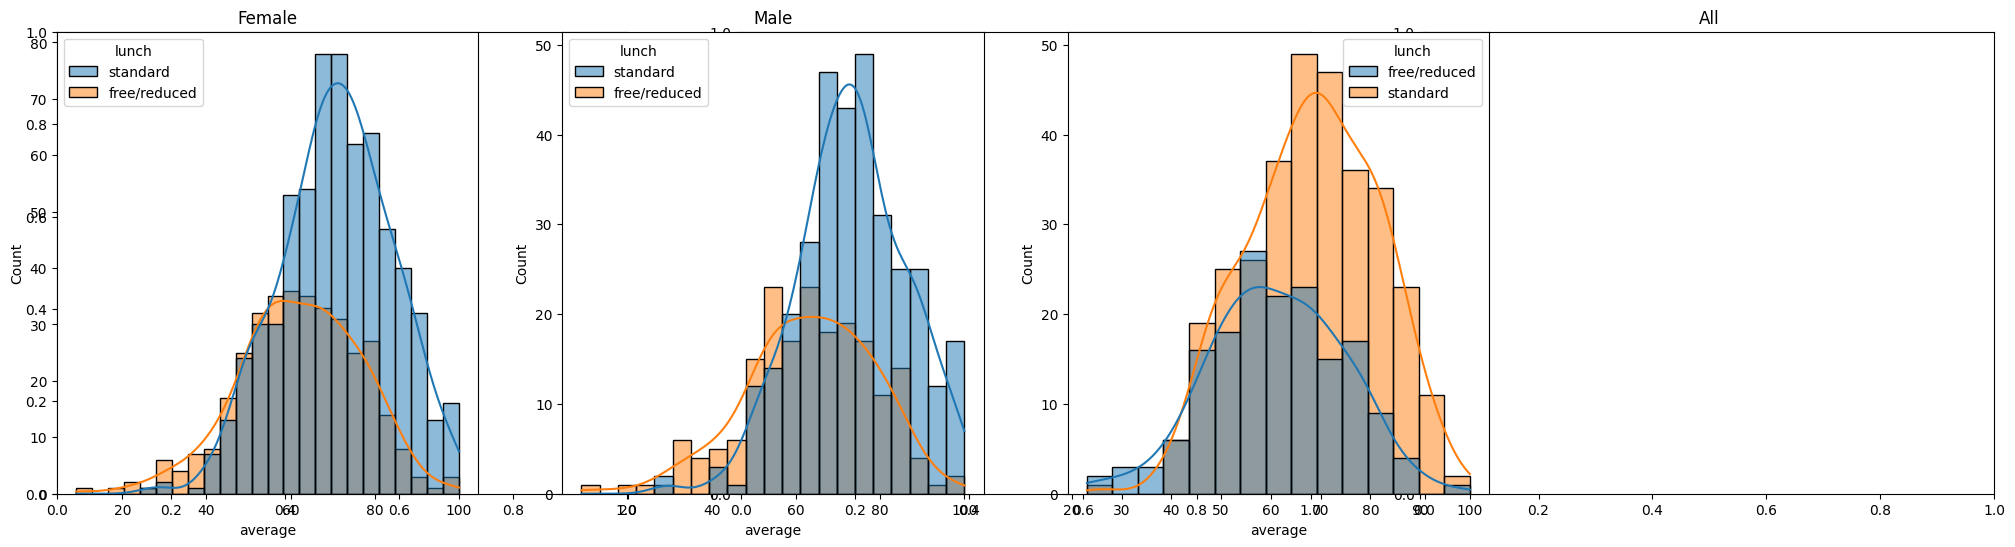

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))

gender_df = lambda gender: df[df.gender == gender]
df_m = gender_df("male")
df_f = gender_df("female")

histograms = [
    ("All", 141, dict(data=df, x="average")),
    ("Female", 142, dict(data=df_f, x="average")),
    ("Male", 143, dict(data=df_m, x="average")),
]
for histogram in histograms:
    plt.title(histogram[0])
    plt.subplot(histogram[1])
    sns.histplot(**histogram[2], kde=True, hue="lunch")
plt.show()

Insights:

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.


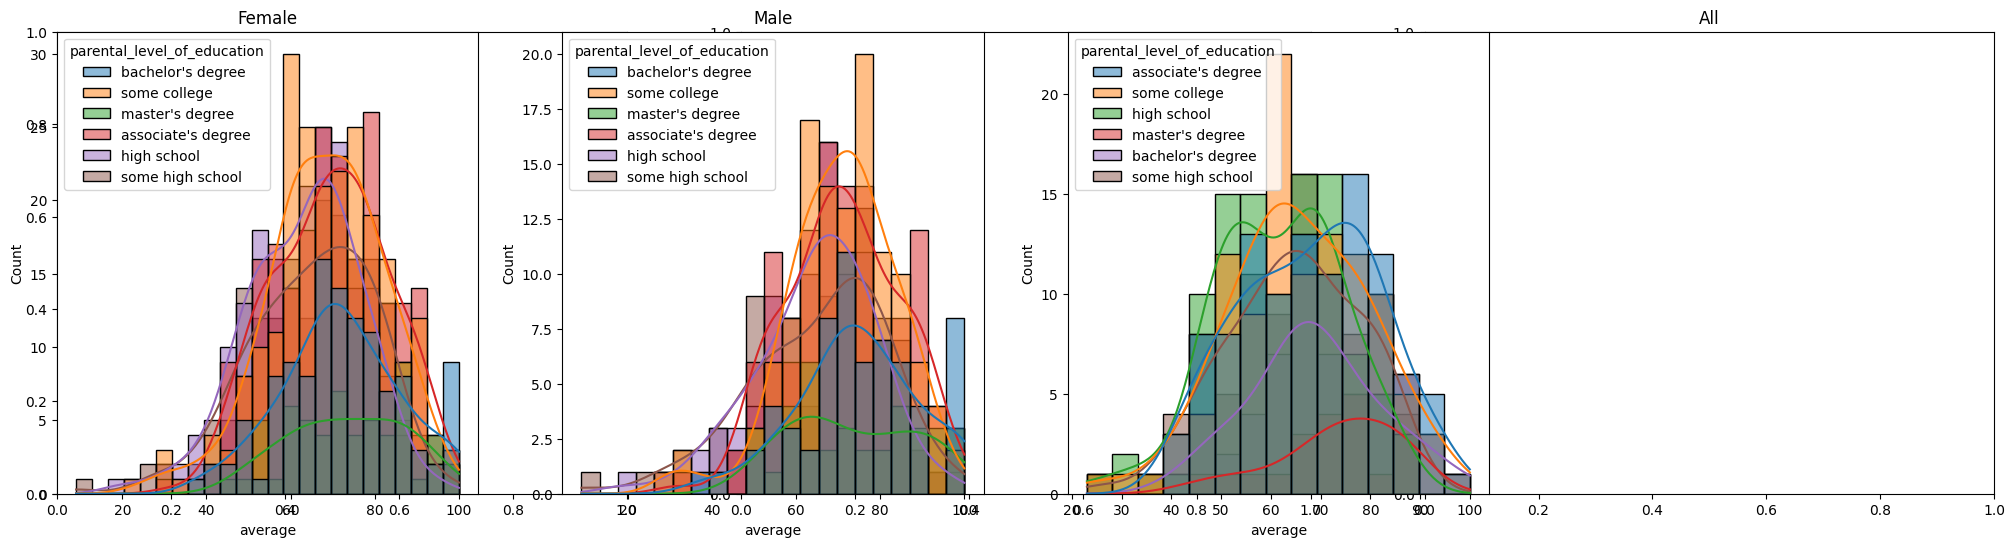

In [88]:
plt.subplots(1, 3, figsize=(25, 6))

gender_df = lambda gender: df[df.gender == gender]
df_m = gender_df("male")
df_f = gender_df("female")

histograms = [
    ("All", 141, dict(data=df, x="average")),
    ("Female", 142, dict(data=df_f, x="average")),
    ("Male", 143, dict(data=df_m, x="average")),
]
for histogram in histograms:
    plt.title(histogram[0])
    plt.subplot(histogram[1])
    sns.histplot(**histogram[2], kde=True, hue="parental_level_of_education")
plt.show()

Insights

- In general parent's education don't help student perform well in exam.
- Parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- We can see there is no effect of parent's education on female students.


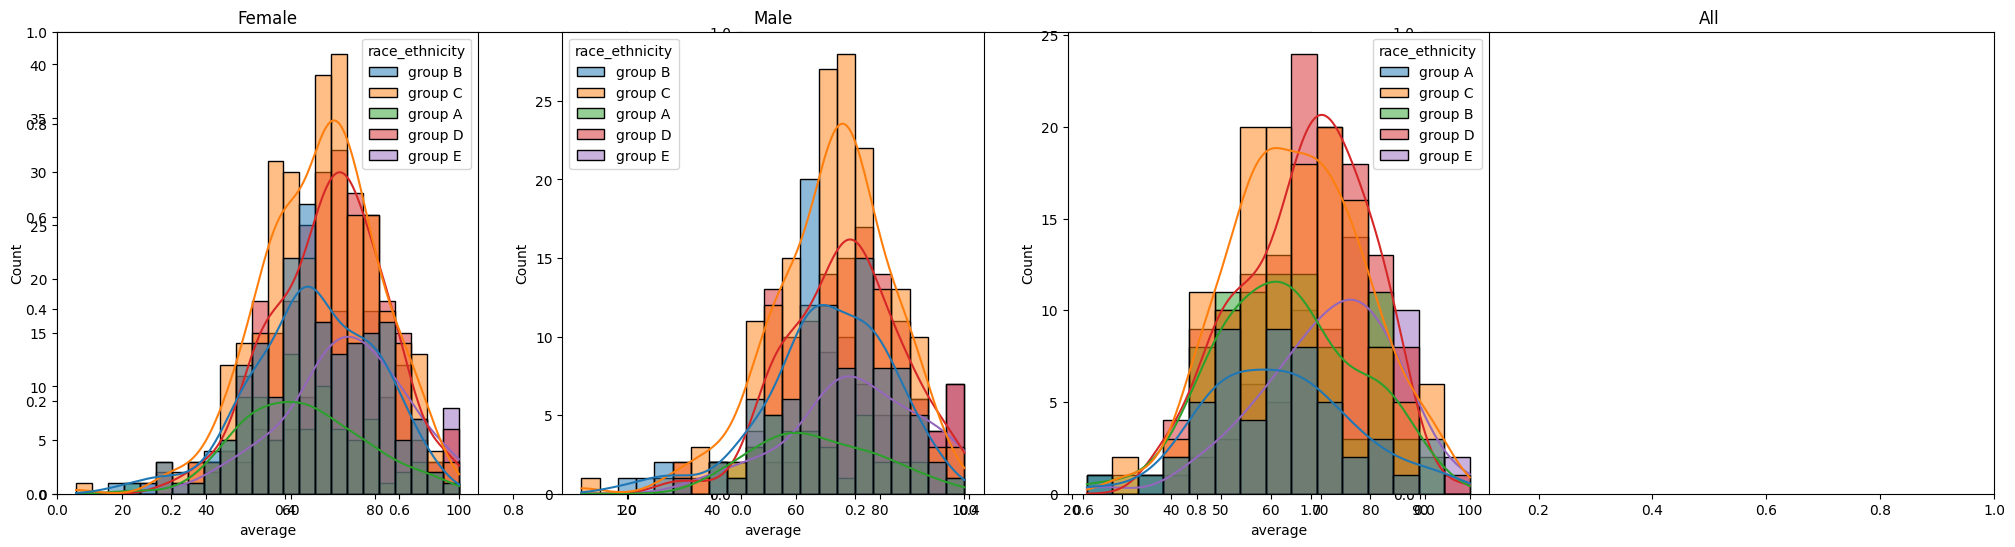

In [90]:
plt.subplots(1, 3, figsize=(25, 6))

gender_df = lambda gender: df[df.gender == gender]
df_m = gender_df("male")
df_f = gender_df("female")

histograms = [
    ("All", 141, dict(data=df, x="average")),
    ("Female", 142, dict(data=df_f, x="average")),
    ("Male", 143, dict(data=df_m, x="average")),
]
for histogram in histograms:
    plt.title(histogram[0])
    plt.subplot(histogram[1])
    sns.histplot(**histogram[2], kde=True, hue="race_ethnicity")
plt.show()

Insights

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
